In [28]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import pandas as pd

In [2]:
#File paths to the location of the data file on your computer
path_to_files = '/Users/loganroy/Desktop/School/Fall_2024/OBS/HW/HW1/'
data_file = 'KOUN_20200828_230247.cdf'
#netcdf4 open statement ('r' means read only). Not the only way to do this...
ncfile = Dataset('{}{}'.format(path_to_files,data_file),'r')

#reading variables from the datafile
Pressure = ncfile.variables['Pressure'][:]
Temperature = ncfile.variables['Temperature'][:]
RH = ncfile.variables['RH'][:]
Height = ncfile.variables['Height'][:]
Wspd = ncfile.variables['Wspd'][:]
Wdir = ncfile.variables['Wdir'][:]

#close the file you opened! 
ncfile.close()

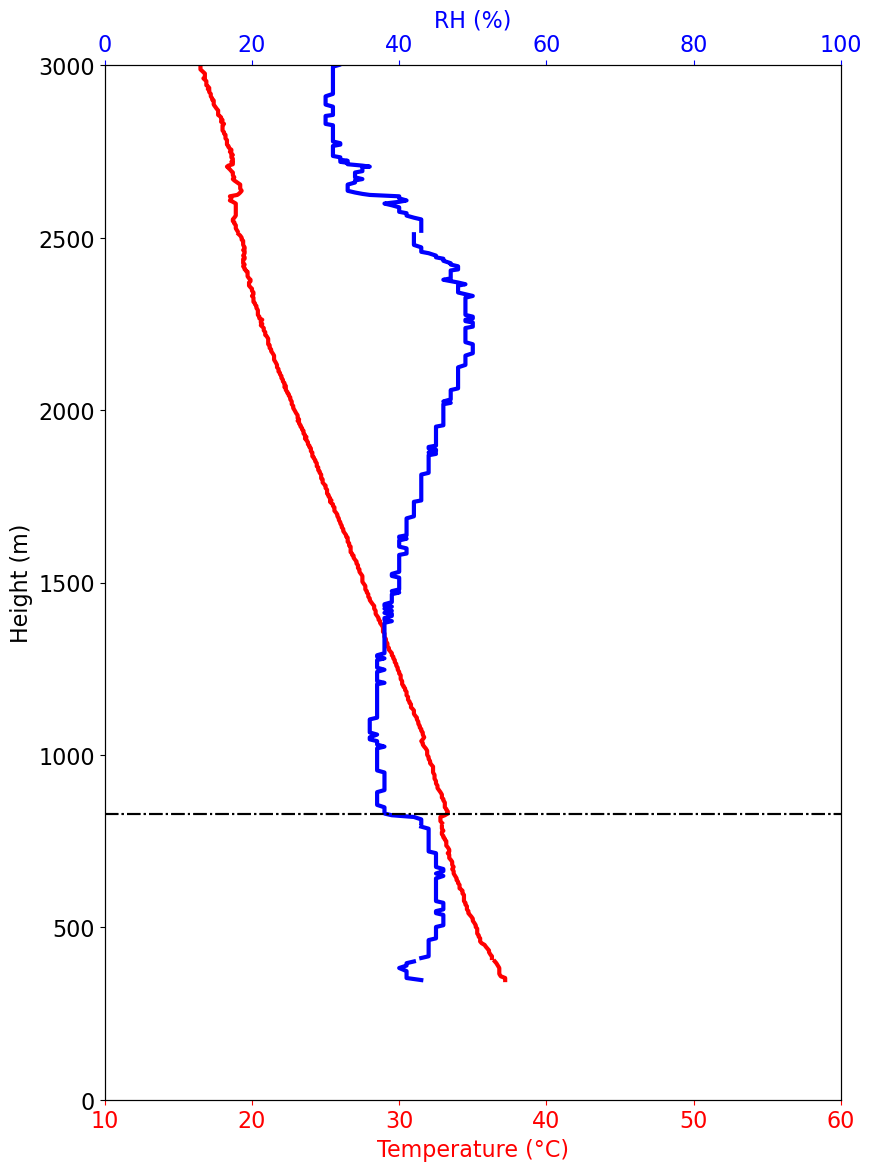

In [3]:
# A figure setting to make fonts big enough to read
plt.rcParams['font.size'] = 16

# building a figure with
# subplots can be used to make multiple or one 'subplot' which your
# axis object can refer to. 
fig, ax1 = plt.subplots(figsize=(9,12))
# Plot temperature
ax1.plot(Temperature, Height, 'r-', lw=3,label='Temperature (°C)')
#ax1.plot(Wspd, Height, 'r-', lw=3,label='Temperature (°C)')
#ax1.plot(Wdir, Height, 'r-', lw=3,label='Temperature (°C)')

#ax.plot(Wspd,Height,'g-',lw=3,label="Wind Speed")
#ax.plot(Wdir,Height,'k-',lw=3,label="Wind Direction")
# color the labels/ticks to match can be useful sometimes 
ax1.set_xlabel('Temperature (°C)',color='r')
ax1.tick_params('x', colors='r')
ax1.set_ylabel('Height (m)')
# setting data ranges for the axes
ax1.set_ylim(0,3000)
ax1.set_xlim(10,60)

ax2 = ax1.twiny()  # instantiate a second Axes that shares the same x-axis

color = 'blue'
ax2.set_xlabel('RH (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(RH,Height,'b-',lw=3,label="Relative Humidity")
ax2.plot([0,100],[830,830],c='k',ls='-.')
ax2.plot([0,100],[830,830],c='k',ls='-.')
ax2.set_xlim([0,100])
ax2.tick_params(axis='x', colors=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("prob1_fig.png")
plt.show()

In [12]:
import h5py 
fil_loc = 'NEON.D11.OAES.DP4.00200.001.2023-01.expanded.20240127T000425Z.RELEASE-2024/NEON.D11.OAES.DP4.00200.001.nsae.2023-01-23.expanded.20240121T111652Z.h5'

Text(0.5, 0, 'Time of Day')

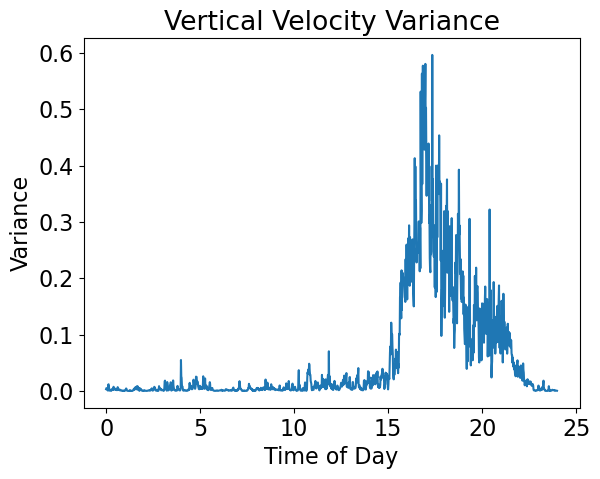

In [72]:
names = ['mean','min','max','var','sample number','start time','end time']
df = pd.read_csv("Data.csv",names=names,header=None)
time_of_day = [int(x[-13:-11])+(int(x[-10:-8])/60) for x in df['start time'][:]]
plt.plot(time_of_day,df['var'])
plt.title('Vertical Velocity Variance')
plt.ylabel("Variance")
plt.xlabel("Time of Day")

In [66]:
time_of_day = [int(x[-13:-11])+(int(x[-10:-8])/60) for x in df['start time'][:]]

In [67]:
time_of_day

[0.0,
 0.016666666666666666,
 0.03333333333333333,
 0.05,
 0.06666666666666667,
 0.08333333333333333,
 0.1,
 0.11666666666666667,
 0.13333333333333333,
 0.15,
 0.16666666666666666,
 0.18333333333333332,
 0.2,
 0.21666666666666667,
 0.23333333333333334,
 0.25,
 0.26666666666666666,
 0.2833333333333333,
 0.3,
 0.31666666666666665,
 0.3333333333333333,
 0.35,
 0.36666666666666664,
 0.38333333333333336,
 0.4,
 0.4166666666666667,
 0.43333333333333335,
 0.45,
 0.4666666666666667,
 0.48333333333333334,
 0.5,
 0.5166666666666667,
 0.5333333333333333,
 0.55,
 0.5666666666666667,
 0.5833333333333334,
 0.6,
 0.6166666666666667,
 0.6333333333333333,
 0.65,
 0.6666666666666666,
 0.6833333333333333,
 0.7,
 0.7166666666666667,
 0.7333333333333333,
 0.75,
 0.7666666666666667,
 0.7833333333333333,
 0.8,
 0.8166666666666667,
 0.8333333333333334,
 0.85,
 0.8666666666666667,
 0.8833333333333333,
 0.9,
 0.9166666666666666,
 0.9333333333333333,
 0.95,
 0.9666666666666667,
 0.9833333333333333,
 1.0,
 1.0166

In [13]:
f = h5py.File(fil_loc, 'r')

In [14]:
list(f.keys())

['OAES', 'objDesc', 'readMe']

In [15]:
dset = f['OAES']

In [16]:
list(dset.keys())

['dp01', 'dp02', 'dp03', 'dp04', 'dp0p']

In [17]:
dset['dp01']['data']['soni']['000_040_01m'].keys()

<KeysViewHDF5 ['angZaxsErth', 'tempAir', 'tempSoni', 'veloXaxsErth', 'veloXaxsYaxsErth', 'veloYaxsErth', 'veloZaxsErth']>

In [18]:
w = dset['dp01']['data']['soni']['000_040_01m']['veloZaxsErth']

In [19]:
print(np.array(w))

[(-0.0382204 , -0.21728066, 0.13084269, 0.00247098, 1200., b'2023-01-23T00:00:00.000Z', b'2023-01-23T00:00:59.950Z')
 (-0.04836475, -0.28752741, 0.19107888, 0.0046088 , 1200., b'2023-01-23T00:01:00.000Z', b'2023-01-23T00:01:59.950Z')
 (-0.05263454, -0.34865069, 0.31983625, 0.00594924, 1200., b'2023-01-23T00:02:00.000Z', b'2023-01-23T00:02:59.950Z')
 ...
 (-0.04472342, -0.39876877, 0.38372858, 0.01160846, 1200., b'2023-01-23T23:57:00.000Z', b'2023-01-23T23:57:59.950Z')
 (-0.02173597, -0.32404883, 0.24743624, 0.00595002, 1200., b'2023-01-23T23:58:00.000Z', b'2023-01-23T23:58:59.950Z')
 (-0.02697939, -0.39470842, 0.2894638 , 0.00604969, 1200., b'2023-01-23T23:59:00.000Z', b'2023-01-23T23:59:59.950Z')]


In [26]:
dset['dp01']['data']['soni']['000_040_01m'].keys()

<KeysViewHDF5 ['angZaxsErth', 'tempAir', 'tempSoni', 'veloXaxsErth', 'veloXaxsYaxsErth', 'veloYaxsErth', 'veloZaxsErth']>

In [23]:
dset['dp01']['data']['soni']['000_040_01m']['tempAir'][0]

(6.14537771, 5.91986315, 6.3835079, 0.00626813, 1200., b'2023-01-23T00:00:00.000Z', b'2023-01-23T00:00:59.950Z')

In [24]:
print(dset['dp01']["data"]['soni']['000_040_01m']['veloZaxsErth'][:])

[(-0.0382204 , -0.21728066, 0.13084269, 0.00247098, 1200., b'2023-01-23T00:00:00.000Z', b'2023-01-23T00:00:59.950Z')
 (-0.04836475, -0.28752741, 0.19107888, 0.0046088 , 1200., b'2023-01-23T00:01:00.000Z', b'2023-01-23T00:01:59.950Z')
 (-0.05263454, -0.34865069, 0.31983625, 0.00594924, 1200., b'2023-01-23T00:02:00.000Z', b'2023-01-23T00:02:59.950Z')
 ...
 (-0.04472342, -0.39876877, 0.38372858, 0.01160846, 1200., b'2023-01-23T23:57:00.000Z', b'2023-01-23T23:57:59.950Z')
 (-0.02173597, -0.32404883, 0.24743624, 0.00595002, 1200., b'2023-01-23T23:58:00.000Z', b'2023-01-23T23:58:59.950Z')
 (-0.02697939, -0.39470842, 0.2894638 , 0.00604969, 1200., b'2023-01-23T23:59:00.000Z', b'2023-01-23T23:59:59.950Z')]


In [25]:
dset['dp01']['data']['soni'][].keys()

SyntaxError: invalid syntax (132379543.py, line 1)

In [27]:
print(dset['dp01']["data"]['soni']['000_040_01m']['veloZaxsErth'][:])

[(-0.0382204 , -0.21728066, 0.13084269, 0.00247098, 1200., b'2023-01-23T00:00:00.000Z', b'2023-01-23T00:00:59.950Z')
 (-0.04836475, -0.28752741, 0.19107888, 0.0046088 , 1200., b'2023-01-23T00:01:00.000Z', b'2023-01-23T00:01:59.950Z')
 (-0.05263454, -0.34865069, 0.31983625, 0.00594924, 1200., b'2023-01-23T00:02:00.000Z', b'2023-01-23T00:02:59.950Z')
 ...
 (-0.04472342, -0.39876877, 0.38372858, 0.01160846, 1200., b'2023-01-23T23:57:00.000Z', b'2023-01-23T23:57:59.950Z')
 (-0.02173597, -0.32404883, 0.24743624, 0.00595002, 1200., b'2023-01-23T23:58:00.000Z', b'2023-01-23T23:58:59.950Z')
 (-0.02697939, -0.39470842, 0.2894638 , 0.00604969, 1200., b'2023-01-23T23:59:00.000Z', b'2023-01-23T23:59:59.950Z')]
